In [1]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as patches
#from prettytable import PrettyTable
import c_crosscheck_mifsim_gui as mif

%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



# Base Model
## Base model is only with amplitude detectors, no photo detectors

In [2]:
configuration=('MI') #MI,FPMI,PRFPMI,DRFPMI
base_m = mif.model_base(configuration)

if configuration == "MI":
    import c_crosscheck_ifo_models_MI as ifo
elif configuration == "FPMI":
    import c_crosscheck_ifo_models_FPMI as ifo
elif configuration == "PRFPMI":
    import c_crosscheck_ifo_models_PRFPMI as ifo
elif configuration == "DRFPMI":
    import c_crosscheck_ifo_models_DRFPMI as ifo
base_i = ifo.model_base

# Sweep

In [3]:
#cross check
# sweep
DOF=('MICH') #DARM,CARM,MICH,PRCL,
NOD=('REFL') #REFL,AS,POP,TMSX,TMSY
model, out_i = ifo.run_sweep(DOF, base_i)
model, out_m = mif.run_sweep(DOF, base_m)

#ifo-model
CR=('CR_'+NOD)
SB1p=('SB1p_'+NOD)
SB1m=('SB1m_'+NOD)
SB2p=('SB2p_'+NOD)
SB2m=('SB2m_'+NOD)


#gui
car_ad=('car_ad_'+NOD)
fsb1_upper=('fsb1_upper_ad_'+NOD)
fsb2_upper=('fsb2_upper_ad_'+NOD)
fsb1_lower=('fsb1_lower_ad_'+NOD)
fsb2_lower=('fsb2_lower_ad_'+NOD)



#figure of GUI and ifo-model
plt.figure(1)

#ifo-model
plt.semilogy(out_i.x, out_i[CR]**2,label="ifo-model_Carrier",color="yellow") # CR => 0
plt.semilogy(out_i.x, out_i[SB1p]**2,label="ifo-model_f1 upper",color="red",linewidth="2")
plt.semilogy(out_i.x, out_i[SB1m]**2,label="ifo-model_f1 lower",color="blue",linewidth="2")
plt.semilogy(out_i.x, out_i[SB2p]**2,label="ifo-model_f2 upper",color="darkblue",linewidth="2")
plt.semilogy(out_i.x, out_i[SB2m]**2,label="ifo-model_f2 lower",color="aqua",linewidth="2")

#mifsim_gui
plt.semilogy(out_m.x, out_m[car_ad]**2,label="GUI_Carrier",LineStyle='--',color="purple") # CR => 0
plt.semilogy(out_m.x, out_m[fsb1_upper]**2,label="GUI_f1 upper",LineStyle='--',color="green",linewidth="2")
plt.semilogy(out_m.x, out_m[fsb1_lower]**2,label="GUI_f1 lower",LineStyle='--',color="orange",linewidth="2")
plt.semilogy(out_m.x, out_m[fsb2_upper]**2,label="GUI_f2 upper",LineStyle='--',color="lime",linewidth="2")
plt.semilogy(out_m.x, out_m[fsb2_lower]**2,label="GUI_f2 lower",LineStyle=':',color="magenta",linewidth="2")
plt.title(DOF+' sweep')
ylabel=("Power at "+NOD+"[W]")
xlabel=(DOF+'turning[deg]')                      
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.ylim(1e-4,1e1)
plt.legend(loc=3)
plt.show

#plt.savefig(configuration+"_"+DOF+"_"+NOD+"_power.png")

AttributeError: 'function' object has no attribute 'deepcopy'

# Dumodulated signal

In [ ]:

#dumodulated signal
#DRFPMI
DOF=('DARM') #DARM,CARM,MICH,PRCL,SRCL 
NOD=('POP') #REFL,AS,POP,POS,nTMSX,nTMSY

model,out_i = ifo.run_fsig(DOF,base_i)
model,out_m = mif.run_fsig(DOF,base_m)

#ifo-models
I1=('pd1_'+NOD+'I1')
I2=('pd1_'+NOD+'I2')
Q1=('pd1_'+NOD+'Q1')
Q2=('pd1_'+NOD+'Q2')


#gui
GUI_I1=('pd1_fsb1_0_'+NOD)
GUI_Q1=('pd1_Qphase_90_'+NOD)
GUI_I2=('pd1_Iphase_0_'+NOD)
GUI_Q2=('pd1_Qphase_90_'+NOD)

fig = plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.loglog(out_i.x, np.abs(out_i[I1]),label="ifo-model_"+NOD+"I1",c='yellow')
plt.loglog(out_i.x, np.abs(out_i[I2]),label="ifo-model_"+NOD+"I2",c='orange')
plt.loglog(out_i.x, np.abs(out_i[Q1]),label="ifo-model_"+NOD+"Q1",c='blue')
plt.loglog(out_i.x, np.abs(out_i[Q2]),label="ifo-model_"+NOD+"Q2",c='darkblue')
plt.loglog(out_m.x, np.abs(out_m[GUI_I1]),label="GUI_"+NOD+"I1",c='purple',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_I2]),label="GUI_"+NOD+"I2",c='green',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_Q1]),label="GUI_"+NOD+"Q1",c='red',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_Q2]),label="GUI_"+NOD+"Q2",c='lime',Linestyle='--')

plt.xlim(0.001,100)
plt.title(configuration+"_"+DOF+' of dumodulates signal')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_i.x, np.angle(out_i[I1])*180/np.pi,label="ifo-model_"+NOD+"I1",c='yellow')
plt.semilogx(out_i.x, np.angle(out_i[I2])*180/np.pi,label="ifo-model_"+NOD+"I2",c='orange')
plt.semilogx(out_i.x, np.angle(out_i[Q1])*180/np.pi,label="ifo-model_"+NOD+"Q1",c='blue')
plt.semilogx(out_i.x, np.angle(out_i[Q2])*180/np.pi,label="ifo-model_"+NOD+"Q2",c='darkblue')
plt.semilogx(out_m.x, np.angle(out_m[GUI_I1])*180/np.pi,label="GUI_"+NOD+"I1",c='purple',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_I2])*180/np.pi,label="GUI_"+NOD+"I2",c='green',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_Q1])*180/np.pi,label="GUI_"+NOD+"Q1",c='red',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_Q2])*180/np.pi,label="GUI_"+NOD+"Q2",c='lime',Linestyle='--')
plt.ylim(-200,200)
plt.yticks([-180,-90,0,90,180])
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

plt.show
#plt.savefig(configuration+"_"+DOF+"_"+NOD+"_dumodulates signal.png")
#plt.savefig(configuration+"_"+DOF+"_"+NOD+"_dumodulates signal.pdf")



# Transfer function

C:\Users\pirik\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\pirik\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\pirik\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\pirik\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\pirik\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Case-insensitive properties were deprec

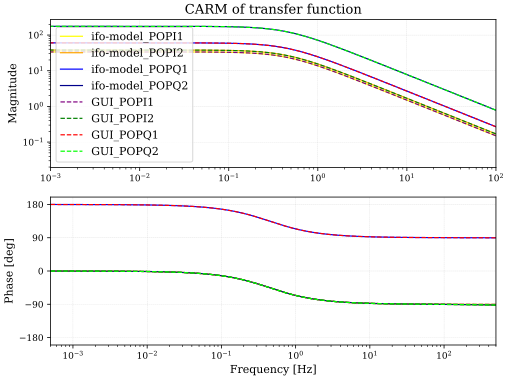

In [12]:

#transfer function
DOF=('DARM') #DARM,CARM,MICH,PRCL,SRCL 
NOD=('POP') #REFL,AS,POP,POS,nTMSX,nTMSY

model,out_i = ifo.run_fsig(DOF,base_i)
model,out_m = mif.run_fsig(DOF,base_m)

#ifo-models
I1=('pd2_'+NOD+'I1')
I2=('pd2_'+NOD+'I2')
Q1=('pd2_'+NOD+'Q1')
Q2=('pd2_'+NOD+'Q2')


#gui
GUI_I1=('pd2_fsb1_0_'+NOD)
GUI_Q1=('pd2_Qphase_90_'+NOD)
GUI_I2=('pd2_Iphase_0_'+NOD)
GUI_Q2=('pd2_Qphase_90_'+NOD)

fig = plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.loglog(out_i.x, np.abs(out_i[I1]),label="ifo-model_"+NOD+"I1",c='yellow')
plt.loglog(out_i.x, np.abs(out_i[I2]),label="ifo-model_"+NOD+"I2",c='orange')
plt.loglog(out_i.x, np.abs(out_i[Q1]),label="ifo-model_"+NOD+"Q1",c='blue')
plt.loglog(out_i.x, np.abs(out_i[Q2]),label="ifo-model_"+NOD+"Q2",c='darkblue')
plt.loglog(out_m.x, np.abs(out_m[GUI_I1]),label="GUI_"+NOD+"I1",c='purple',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_I2]),label="GUI_"+NOD+"I2",c='green',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_Q1]),label="GUI_"+NOD+"Q1",c='red',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_Q2]),label="GUI_"+NOD+"Q2",c='lime',Linestyle='--')

plt.xlim(0.001,100)
plt.title(configuration+"_"+DOF+' of transfer function')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_i.x, np.angle(out_i[I1])*180/np.pi,label="ifo-model_"+NOD+"I1",c='yellow')
plt.semilogx(out_i.x, np.angle(out_i[I2])*180/np.pi,label="ifo-model_"+NOD+"I2",c='orange')
plt.semilogx(out_i.x, np.angle(out_i[Q1])*180/np.pi,label="ifo-model_"+NOD+"Q1",c='blue')
plt.semilogx(out_i.x, np.angle(out_i[Q2])*180/np.pi,label="ifo-model_"+NOD+"Q2",c='darkblue')
plt.semilogx(out_m.x, np.angle(out_m[GUI_I1])*180/np.pi,label="GUI_"+NOD+"I1",c='purple',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_I2])*180/np.pi,label="GUI_"+NOD+"I2",c='green',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_Q1])*180/np.pi,label="GUI_"+NOD+"Q1",c='red',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_Q2])*180/np.pi,label="GUI_"+NOD+"Q2",c='lime',Linestyle='--')
plt.ylim(-200,200)
plt.yticks([-180,-90,0,90,180])
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

plt.show
#plt.savefig(configuration+"_"+DOF+"_"+NOD+"_transfer function.png")
#plt.savefig(configuration+"_"+DOF+"_"+NOD+"_transfer function.pdf")

